# Практическая работа 5 Журавлев Александр Дмитриевич ББМО-02-23

Подключение библиотек

In [1]:
!pip install foolbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.5 MB/s eta 0:00:00


In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import torch
import foolbox as fb
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Загрузка обученной модели и данных MNIST

In [3]:
(_, _), (test_images, test_labels) = mnist.load_data()

test_images = test_images / 255.0

test_labels = to_categorical(test_labels, num_classes=10)

model = tf.keras.models.load_model('mnist_model.h5')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print(f'Test accuracy on clean images: {test_acc:.2%}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Test accuracy on clean images: 97.73%


Реализация атаки DeepFool

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


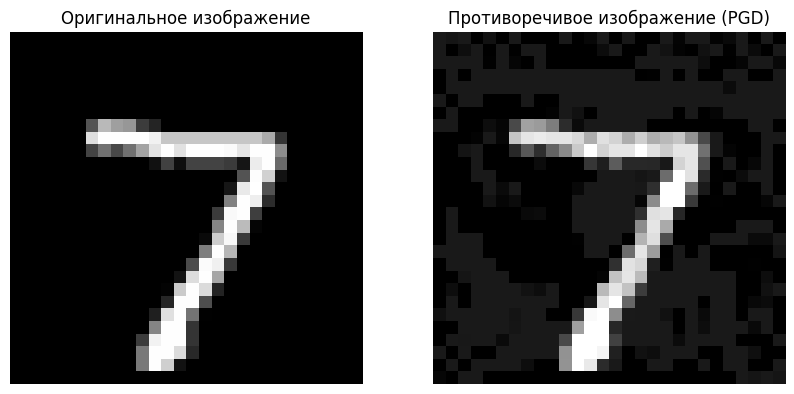

In [4]:
fmodel = fb.TensorFlowModel(model, bounds=(0, 1))

image = tf.convert_to_tensor(test_images[0], dtype=tf.float32)[None, ...]
label = tf.convert_to_tensor(np.argmax(test_labels[0]), dtype=tf.int64)

attack = fb.attacks.LinfPGD()
advs, _, _ = attack(fmodel, image, label[None], epsilons=0.1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Оригинальное изображение")
plt.imshow(image[0].numpy(), cmap="gray")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Противоречивое изображение (PGD)")
plt.imshow(advs[0].numpy(), cmap="gray")
plt.axis('off')
plt.show()

Оценка модели

In [5]:
adversarial_images = []
for i in range(len(test_images)):
    img = tf.convert_to_tensor(test_images[i], dtype=tf.float32)[None, ...]
    lbl = tf.convert_to_tensor(np.argmax(test_labels[i]), dtype=tf.int64)
    adv, _, _ = attack(fmodel, img, lbl[None], epsilons=0.1)
    adversarial_images.append(adv)

adversarial_images = tf.concat(adversarial_images, axis=0)

adversarial_loss, adversarial_acc = model.evaluate(adversarial_images, test_labels, verbose=0)
print(f'Accuracy on adversarial examples (PGD) {adversarial_acc:.2%}')

Accuracy on adversarial examples (PGD) 7.22%
